In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [3]:
import pandas as pd

# Specify the file path from the desktop
file_path = r'C:\Users\rutuj\OneDrive\Documents\OneDrive\Desktop\emoemo.csv'

In [4]:
data = pd.read_csv('emoemo.csv')

In [5]:
data.head(), data.columns

(                                                text  Emotion
 0  i seriously hate one subject to death but now ...     hate
 1                 im so full of life i feel appalled  neutral
 2  i sit here to write i start to dig out my feel...  neutral
 3  ive been really angry with r and i feel like a...    anger
 4  i feel suspicious if there is no one outside l...  neutral,
 Index(['text', 'Emotion'], dtype='object'))

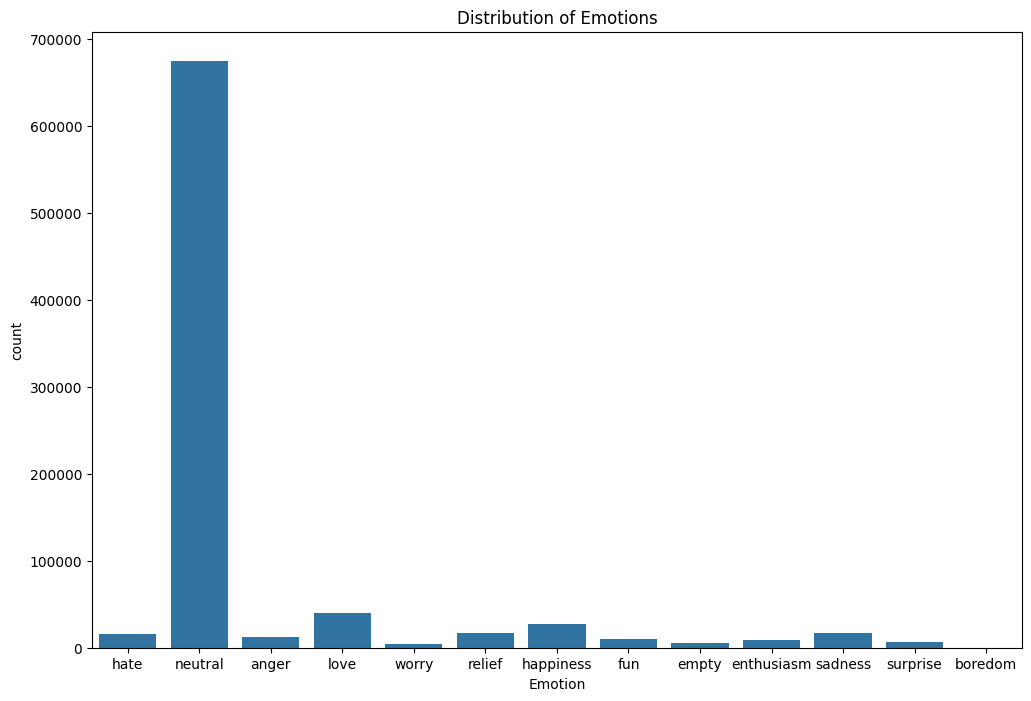

Missing values in each column:
 text       0
Emotion    0
dtype: int64
Basic statistics of numerical features:
                                                  text  Emotion
count                                          839555   839555
unique                                         393822       13
top     i feel more adventurous willing to take risks  neutral
freq                                               32   674538


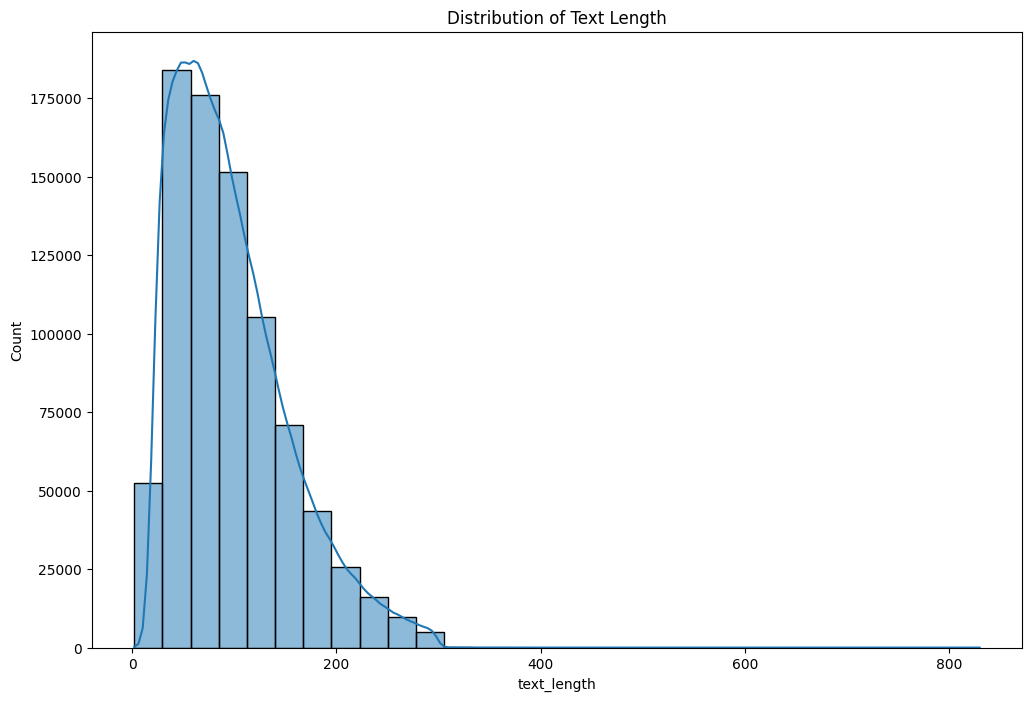

Most common words in the text data:
 [('i', 1362030), ('feel', 583925), ('and', 504081), ('to', 469636), ('the', 436467), ('a', 328147), ('feeling', 270334), ('that', 263329), ('of', 261796), ('my', 223937), ('in', 174173), ('it', 170092), ('like', 148936), ('so', 130958), ('for', 128891), ('im', 124267), ('have', 123436), ('me', 121885), ('but', 118025), ('was', 115975)]


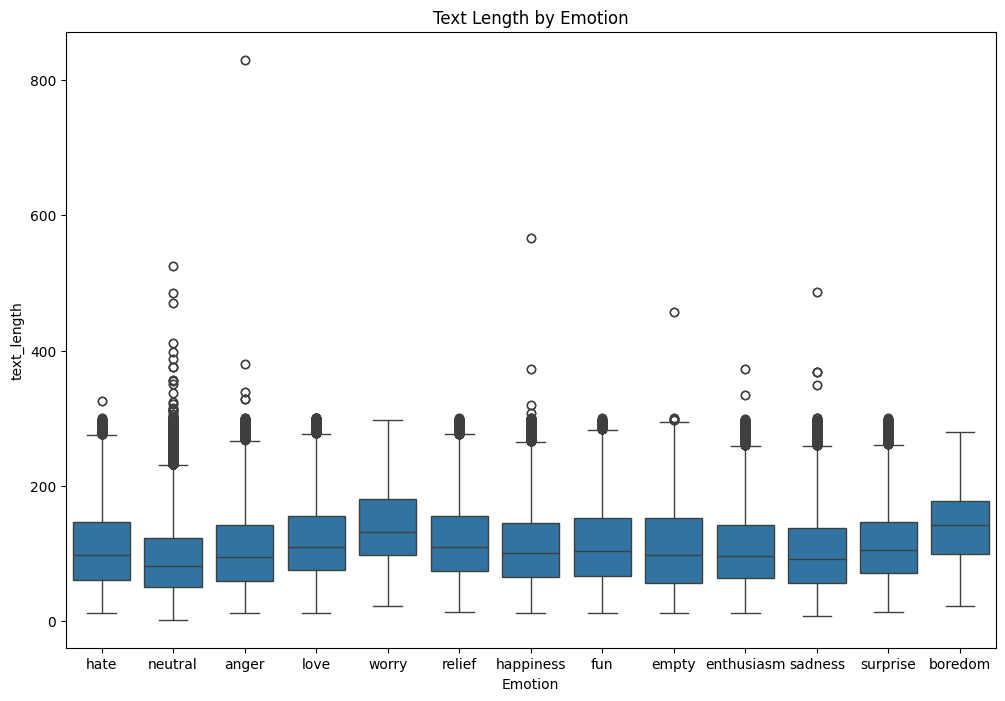

Most common bigrams in the text data:
 [('feel like', 87741), ('to be', 41069), ('im feeling', 39775), ('feel so', 38845), ('to feel', 38038), ('of the', 37674), ('in the', 36239), ('am feeling', 28312), ('feel that', 27850), ('was feeling', 26006), ('and feel', 25316), ('want to', 23522), ('in my', 22864), ('of my', 20959), ('to the', 18697), ('at the', 18133), ('me feel', 17851), ('for the', 16614), ('on the', 16563), ('to do', 15885)]


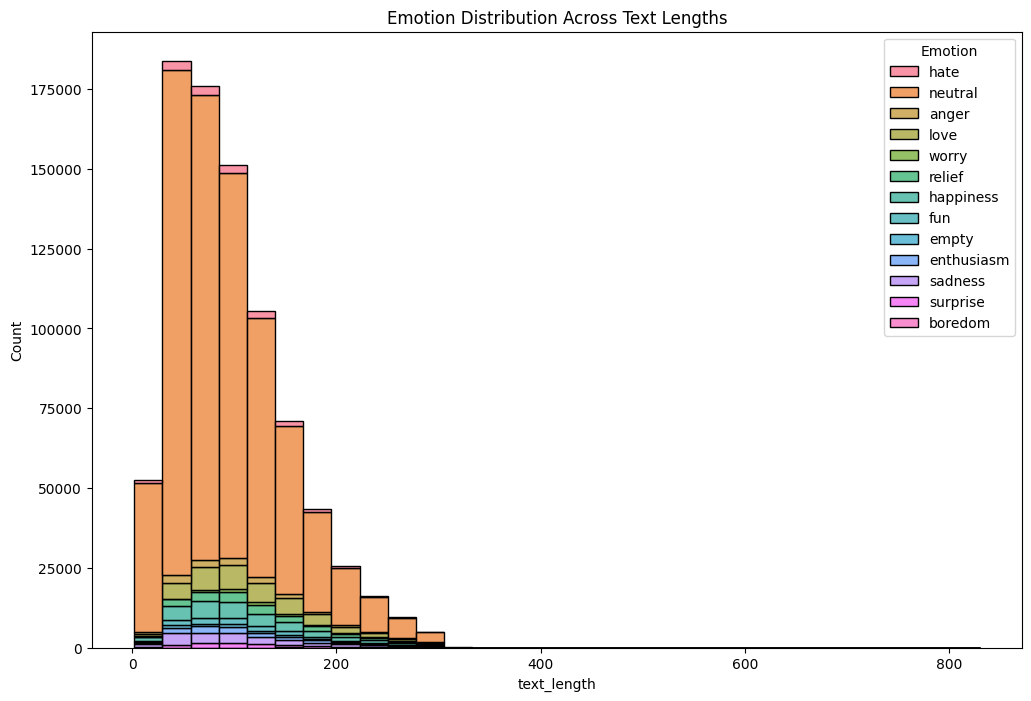

Correlation between text length and emotions:
              text_length  Emotion_num
text_length     1.000000    -0.046082
Emotion_num    -0.046082     1.000000


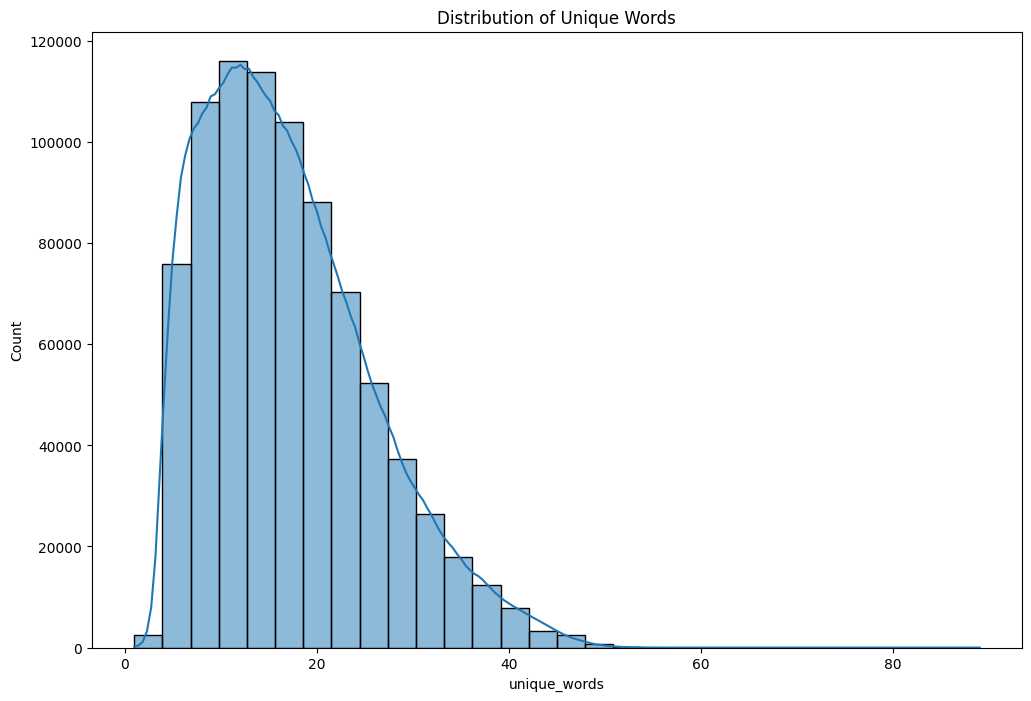

In [6]:
# Exploratory Data Analysis (EDA) with 10 best questions for this data to build a machine learning model

# 1. What is the distribution of the target variable 'Emotion'?
plt.figure(figsize=(12, 8))
sns.countplot(x='Emotion', data=data)
plt.title('Distribution of Emotions')
plt.show()

# 2. Are there any missing values in the dataset?
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# 3. What are the basic statistics of the numerical features?
print("Basic statistics of numerical features:\n", data.describe())

# 4. What is the distribution of text length in the dataset?
data['text_length'] = data['text'].apply(len)
plt.figure(figsize=(12, 8))
sns.histplot(data['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Length')
plt.show()

# 5. What are the most common words in the text data?
from collections import Counter
import re

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    return text

all_words = ' '.join(data['text'].apply(preprocess_text)).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)
print("Most common words in the text data:\n", common_words)

# 6. How does the text length vary across different emotions?
plt.figure(figsize=(12, 8))
sns.boxplot(x='Emotion', y='text_length', data=data)
plt.title('Text Length by Emotion')
plt.show()

# 7. What are the most common bigrams in the text data?
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2, 2))
bigrams = vectorizer.fit_transform(data['text'].apply(preprocess_text))
bigram_freq = Counter(dict(zip(vectorizer.get_feature_names_out(), bigrams.sum(axis=0).tolist()[0])))
common_bigrams = bigram_freq.most_common(20)
print("Most common bigrams in the text data:\n", common_bigrams)

# 8. How are the emotions distributed across different text lengths?
plt.figure(figsize=(12, 8))
sns.histplot(data, x='text_length', hue='Emotion', multiple='stack', bins=30)
plt.title('Emotion Distribution Across Text Lengths')
plt.show()

# 9. Are there any correlations between text length and emotions?
# Convert 'Emotion' to numerical values for correlation calculation
data['Emotion_num'] = data['Emotion'].astype('category').cat.codes
correlation = data[['text_length', 'Emotion_num']].corr()
print("Correlation between text length and emotions:\n", correlation)

# 10. What is the distribution of unique words in the text data?
data['unique_words'] = data['text'].apply(lambda x: len(set(preprocess_text(x).split())))
plt.figure(figsize=(12, 8))
sns.histplot(data['unique_words'], bins=30, kde=True)
plt.title('Distribution of Unique Words')
plt.show()


Emotion
neutral       674538
hate          674538
anger         674538
love          674538
worry         674538
relief        674538
happiness     674538
fun           674538
empty         674538
enthusiasm    674538
sadness       674538
surprise      674538
boredom       674538
Name: count, dtype: int64


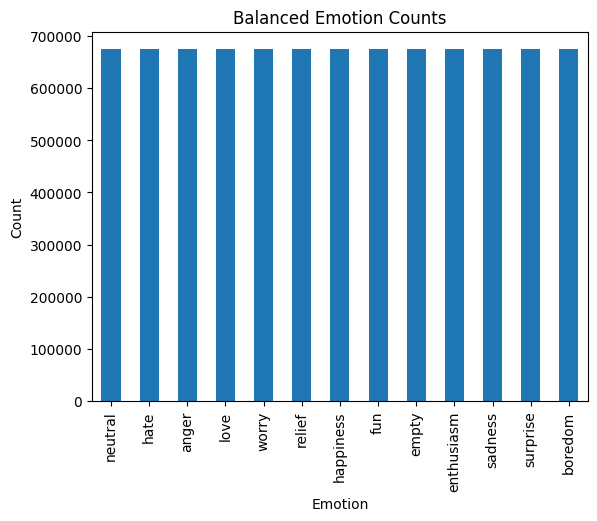

In [7]:
import pandas as pd
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Read the CSV file, explicitly specifying the 'Emotion' column
data = pd.read_csv('emoemo.csv')  # Make sure 'emoemo.csv' is the correct filename

# Check if 'Emotion' column exists
if 'Emotion' not in data.columns:
    print("Error: 'Emotion' column not found in the DataFrame.")
    # Investigate the CSV file to see if the column is named differently or if there are formatting issues
else:
    df = data

    # Separate majority and minority classes
    emotion_classes = df['Emotion'].unique()
    majority_class = df['Emotion'].value_counts().idxmax()
    df_majority = df[df['Emotion'] == majority_class]
    df_minority_classes = {emotion: df[df['Emotion'] == emotion] for emotion in emotion_classes if emotion != majority_class}

    # Upsample minority classes
    df_upsampled_minority_classes = [resample(df_minority,
                                              replace=True,     # sample with replacement
                                              n_samples=len(df_majority),    # to match majority class
                                              random_state=123) # reproducible results
                                     for df_minority in df_minority_classes.values()]

    # Combine majority class with upsampled minority classes
    df_balanced = pd.concat([df_majority] + df_upsampled_minority_classes)

    # Display new class counts
    df_balanced_emotion_counts = df_balanced['Emotion'].value_counts()
    print(df_balanced_emotion_counts)

    # Plot the balanced emotion counts
    df_balanced_emotion_counts.plot(kind='bar')
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.title('Balanced Emotion Counts')
    plt.show()


In [1]:
#Stochastic Gradient Descent (SGD) classifier



import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
# from imblearn.over_sampling import SMOTE
from scipy.stats import uniform

# Read the CSV file
data = pd.read_csv('emoemo.csv')  # Make sure 'emoemo.csv' is the correct filename

# Print column names to verify they are correct
print("Column names:", data.columns)

# Check if 'text' and 'Emotion' columns exist
if 'text' not in data.columns or 'Emotion' not in data.columns:
    print("Error: 'text' or 'Emotion' column not found in the DataFrame.")
else:
    # Define features and target
    X = data['text']
    y = data['Emotion']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Vectorize the text data with CountVectorizer
    vectorizer = CountVectorizer(max_features=5000, ngram_range=(1, 1))  # Reduced max_features and simplified n-gram range
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Balance the dataset using SMOTE (optional, remove for initial speed test)
    # smote = SMote(random_state=42)
    # X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)
    X_train_resampled, y_train_resampled = X_train_vec, y_train  # Remove SMOTE for speed test

    # Hyperparameter tuning for SGDClassifier
    param_distributions = {
        'alpha': uniform(1e-4, 1e-2)  # Reduced range for alpha
    }
    random_search = RandomizedSearchCV(SGDClassifier(max_iter=1000, tol=1e-3), param_distributions, n_iter=5, cv=3, n_jobs=-1, verbose=1, random_state=42)  # Reduced n_iter and cv
    random_search.fit(X_train_resampled, y_train_resampled)

    # Best model from random search
    best_model = random_search.best_estimator_

    # Make predictions
    y_pred = best_model.predict(X_test_vec)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')

    # Classification report
    print(classification_report(y_test, y_pred))

    # Function to predict emotion from text
    def predict_emotion(text):
        text_vec = vectorizer.transform([text])
        prediction = best_model.predict(text_vec)
        return prediction[0]

    # Example usage
    example_text = "I am happy"
    predicted_emotion = predict_emotion(example_text)
    print(f'Predicted Emotion: {predicted_emotion}')


Column names: Index(['text', 'Emotion'], dtype='object')
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Accuracy: 0.9606458183204197


c:\Users\rutuj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rutuj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       anger       0.93      0.64      0.76      2489
     boredom       0.00      0.00      0.00        21
       empty       1.00      0.60      0.75      1096
  enthusiasm       0.99      0.94      0.97      1839
         fun       0.98      0.81      0.89      1977
   happiness       0.95      0.84      0.89      5370
        hate       0.96      0.89      0.93      3018
        love       0.98      0.93      0.95      8001
     neutral       0.96      1.00      0.98    134999
      relief       0.95      0.60      0.74      3396
     sadness       0.99      0.84      0.91      3428
    surprise       0.98      0.83      0.90      1372
       worry       0.92      0.03      0.05       905

    accuracy                           0.96    167911
   macro avg       0.89      0.69      0.75    167911
weighted avg       0.96      0.96      0.96    167911

Predicted Emotion: happiness


c:\Users\rutuj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000)

# Train the model
logistic_regression_model.fit(X_train_vec, y_train)

# Make predictions
y_pred = logistic_regression_model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Function to predict emotion from text using Logistic Regression
def predict_emotion_logistic(text):
    text_vec = vectorizer.transform([text])
    prediction = logistic_regression_model.predict(text_vec)
    return prediction[0]

# Example usage
example_text = "I am happy"
predicted_emotion = predict_emotion_logistic(example_text)
print(f'Predicted Emotion using Logistic Regression: {predicted_emotion}')


Logistic Regression Accuracy: 0.9940
Classification Report:
              precision    recall  f1-score   support

       anger       0.99      0.95      0.97      2489
     boredom       1.00      0.76      0.86        21
       empty       1.00      0.96      0.98      1096
  enthusiasm       1.00      0.98      0.99      1839
         fun       1.00      0.91      0.95      1977
   happiness       0.99      0.98      0.99      5370
        hate       1.00      0.98      0.99      3018
        love       1.00      0.99      0.99      8001
     neutral       0.99      1.00      1.00    134999
      relief       0.99      0.93      0.96      3396
     sadness       1.00      0.97      0.98      3428
    surprise       1.00      0.97      0.98      1372
       worry       1.00      1.00      1.00       905

    accuracy                           0.99    167911
   macro avg       1.00      0.95      0.97    167911
weighted avg       0.99      0.99      0.99    167911

Predicted Emotion u

In [4]:
import streamlit as st

# Title of the web app
st.title('Emotion Prediction using Logistic Regression')

# Text input for user to enter text
user_input = st.text_input('Enter text to predict emotion:')

# Button to make prediction
if st.button('Predict'):
    if user_input:
        # Predict emotion
        predicted_emotion = predict_emotion_logistic(user_input)
        # Display the prediction
        st.write(f'Predicted Emotion: {predicted_emotion}')
    else:
        st.write('Please enter some text to predict.')


2024-07-21 21:03:09.289 
  command:

    streamlit run c:\Users\rutuj\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-07-21 21:03:09.290 Session state does not function when running a script without `streamlit run`


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Initialize models with optimized parameters
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'Support Vector Machine': SVC(kernel='linear'),  # Changed to linear kernel
    'Random Forest': RandomForestClassifier(n_estimators=50, n_jobs=-1)  # Reduced estimators, using all cores
}

# Function to train and evaluate models
def train_and_evaluate(models, X_train_vec, y_train, X_test_vec, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train_vec, y_train)
        accuracy = model.score(X_test_vec, y_test)
        results[name] = accuracy
        print(f'{name}: Accuracy = {accuracy:.4f}')
    return results

# Fix the undefined variable error by using the correct variable names
results = train_and_evaluate(models, X_train_vec, y_train, X_test_vec, y_test)


Logistic Regression: Accuracy = 0.9940
Naive Bayes: Accuracy = 0.9731
